In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

      1. ts (timestamp) ==> epoch
      2. device id ==> object
      3. CO (Carbon Monoxide) in ppm ==> float64
      4. humidity in percent ==> float64
      5. light ==> bool
      6. LPG (liquified Petroleum Gas) in ppm ==> float64
      7. motion ==> bool
      8. smoke in ppm ==> float64
      9. Temperature in Fahrenheit ==> float64

In [3]:
data = pd.read_csv("iot_telemetry_data.csv")
data.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


In [5]:
data.describe()

,ts,co,humidity,lpg,smoke,temp
count,4.051840e+05,405184.000000,405184.000000,405184.000000,405184.000000,405184.000000
mean,1.594858e+09,0.004639,60.511694,0.007237,0.019264,22.453987
std,1.994984e+05,0.001250,11.366489,0.001444,0.004086,2.698347
min,1.594512e+09,0.001171,1.100000,0.002693,0.006692,0.000000
25%,1.594686e+09,0.003919,51.000000,0.006456,0.017024,19.900000
50%,1.594858e+09,0.004812,54.900000,0.007489,0.019950,22.200000
75%,1.595031e+09,0.005409,74.300003,0.008150,0.021838,23.600000
max,1.595203e+09,0.014420,99.900002,0.016567,0.046590,30.600000


In [6]:
data= data.copy()
data = data.drop(['motion'], axis=1)
data.head()



,ts,device,co,humidity,light,lpg,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,0.020448,22.600000


In [7]:
from sklearn.preprocessing import LabelEncoder

encLab = LabelEncoder()
deviceEnc = pd.DataFrame(encLab.fit_transform(data['device']), columns=['condition'])
deviceEnc.index = data.index

dataEnc = pd.concat([data, deviceEnc], axis=1)
dataEnc.head()

,ts,device,co,humidity,light,lpg,smoke,temp,condition
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,0.020411,22.700000,2
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,0.013275,19.700001,0
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,0.020475,22.600000,2
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,0.018628,27.000000,1
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,0.020448,22.600000,2


In [8]:
encLab2 = LabelEncoder()
lightEnc = pd.DataFrame(encLab2.fit_transform(dataEnc['light']), columns=['lights'])
lightEnc.index = dataEnc.index

dataEnc2 = pd.concat([dataEnc, lightEnc], axis=1)
dataEnc2.head()

,ts,device,co,humidity,light,lpg,smoke,temp,condition,lights
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,0.020411,22.700000,2,0
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,0.013275,19.700001,0,0
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,0.020475,22.600000,2,0
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,0.018628,27.000000,1,1
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,0.020448,22.600000,2,0


In [9]:
dataProcessed = dataEnc2.drop(['device', 'light'], axis=1)
dataProcessed.head()

,ts,co,humidity,lpg,smoke,temp,condition,lights
0,1.594512e+09,0.004956,51.000000,0.007651,0.020411,22.700000,2,0
1,1.594512e+09,0.002840,76.000000,0.005114,0.013275,19.700001,0,0
2,1.594512e+09,0.004976,50.900000,0.007673,0.020475,22.600000,2,0
3,1.594512e+09,0.004403,76.800003,0.007023,0.018628,27.000000,1,1
4,1.594512e+09,0.004967,50.900000,0.007664,0.020448,22.600000,2,0


In [35]:
dataProcessed = dataEnc2.drop(['device', 'light','ts'], axis=1)
dataProcessed.head()

,co,humidity,lpg,smoke,temp,condition,lights
0,0.004956,51.000000,0.007651,0.020411,22.700000,2,0
1,0.002840,76.000000,0.005114,0.013275,19.700001,0,0
2,0.004976,50.900000,0.007673,0.020475,22.600000,2,0
3,0.004403,76.800003,0.007023,0.018628,27.000000,1,1
4,0.004967,50.900000,0.007664,0.020448,22.600000,2,0


<AxesSubplot: >

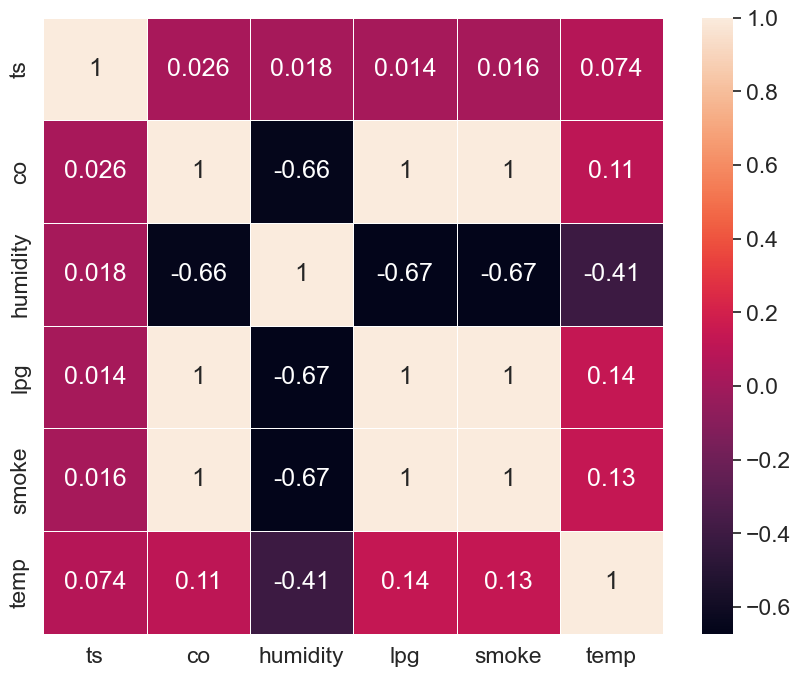

In [14]:
dataCorr = dataProcessed.drop(['lights', 'condition'], axis=1)
corr = dataCorr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, linewidths=.5)

<AxesSubplot: >

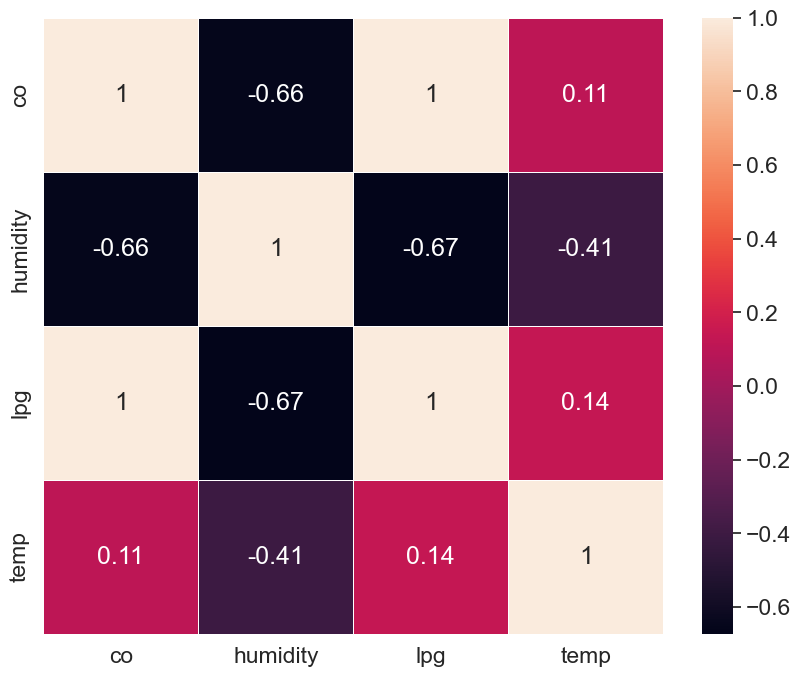

In [38]:
dataCorr = dataProcessed.drop(['lights', 'condition','smoke'], axis=1)
corr = dataCorr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, linewidths=.5)

<AxesSubplot: >

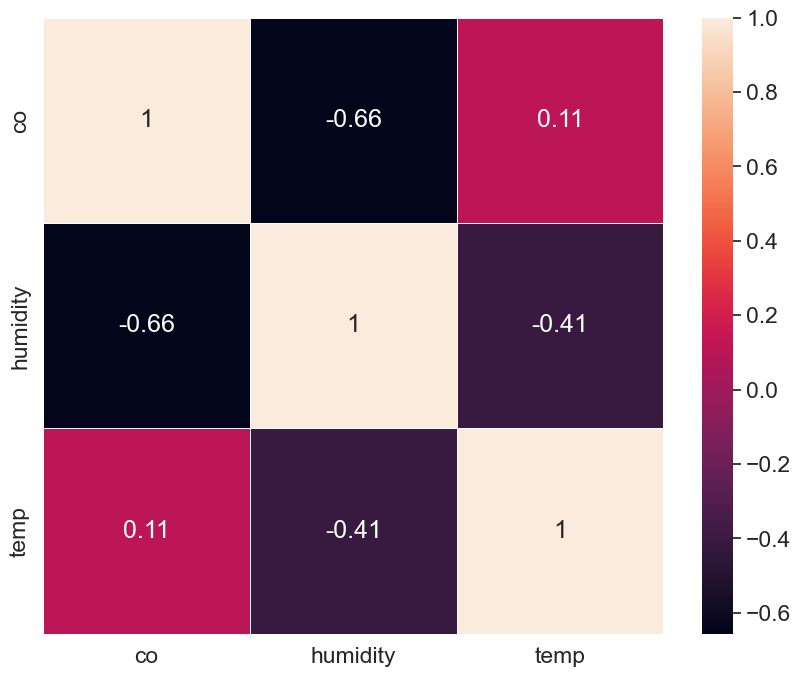

In [40]:
dataCorr = dataProcessed.drop(['lights', 'condition','lpg','smoke'], axis=1)
corr = dataCorr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, linewidths=.5)

In [15]:
dataCleanInput = dataProcessed.copy()
removedCol = ['lpg', 'smoke', 'co']

dataCleaned = dataCleanInput.drop(removedCol, axis=1)
dataCleaned.head()

,ts,humidity,temp,condition,lights
0,1.594512e+09,51.000000,22.700000,2,0
1,1.594512e+09,76.000000,19.700001,0,0
2,1.594512e+09,50.900000,22.600000,2,0
3,1.594512e+09,76.800003,27.000000,1,1
4,1.594512e+09,50.900000,22.600000,2,0


<AxesSubplot: >

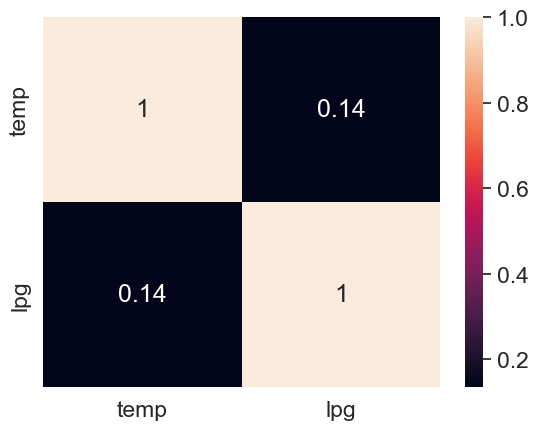

In [13]:
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model   import LinearRegression 




In [42]:
X = dataProcessed["co"].values.reshape(-1, 1)
y = dataProcessed["humidity"].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()


x_standarizado = sc_x.fit_transform(X)
y_standarizado = sc_y.fit_transform(y)

standar_linea_regresion = LinearRegression()
standar_linea_regresion.fit(x_standarizado, y_standarizado)

LinearRegression()

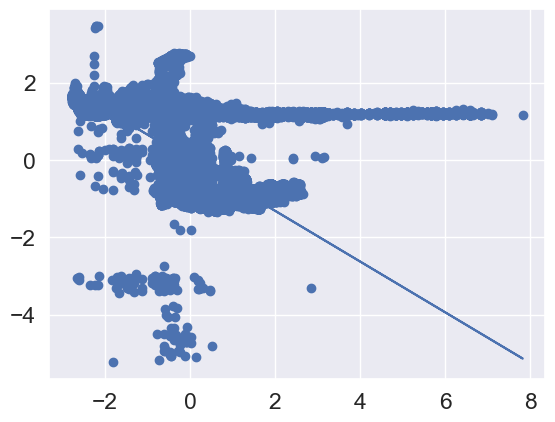

In [43]:
plt.scatter(x_standarizado,y_standarizado)
plt.plot(x_standarizado, standar_linea_regresion.predict(x_standarizado))

In [56]:
co = 0.004967
co_standarizado=sc_x.transform(np.array([co]).reshape(-1, 1))
co_standarizado


array([[0.2625191]])

In [55]:
standar_linea_regresion.predict(co_standarizado)

array([[-0.17240946]])

In [54]:
x= sc_y.inverse_transform(standar_linea_regresion.predict(co_standarizado))
x

array([[58.55200614]])